# Pymaceuticals Inc.

## Analysis
- Of the drug regimes that we studied, Capomulin and Ramicane had the smallest average tumor volume and less variance. This likely makes them better treatment options over Infubinol and Ceftamin.
- When comparing weight to tumor volume in relation to the Capomulin regimen, the correlatoin coefficient is 0.84. This indicates a strong positive relationship between tumor volume and weight.
- In regards to gender, male mice make up a slightly larger part of the population. Overall, gender does not seem to be a significant factor in regards to tumor volume.
- Mouse ID l509 is an example of a mouse treated with Capomulin. The tumor volume increases steadily from timepoints 0 to 20, followed by a significant drop through timepoint 35. This supports the hypothesis that Capomulin is a viable drug regimen to reduce tumor growth.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on=['Mouse ID'])
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Display the number of mice from the merged DataFrame
mouse_count = merged_df['Mouse ID'].nunique()
mouse_count

249

In [4]:
# Find duplicate mice based on Mouse ID and Timepoint
dup_mouse_ID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mouse_ID

array(['g989'], dtype=object)

In [5]:
# OPTIONAL: Get all the data for the duplicate Mouse ID
dup_mouse_df = merged_df.loc[merged_df['Mouse ID'] == 'g989', :]
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame with the dropped duplicate mice
clean_mouse_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Display the number of mice in the new DataFrame
clean_mouse_count = clean_mouse_df['Mouse ID'].nunique()
clean_mouse_count

248

# Summary Statistics

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume
mean = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).mean()
median = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).median()
var = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).var()
std = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).std()
sem = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).sem()

In [9]:
# Create a new DataFrame with the summary statistics
sum_stat_df = pd.DataFrame({'Mean Tumor Volume': mean,
                            'Median Tumor Volume': median,
                            'Tumor Volume Variance': var,
                            'Tumor Volume Std. Dev.': std,
                            'Tumor Volume Std. Err.': sem})
sum_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
sum_stat_agg_df = clean_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_stat_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

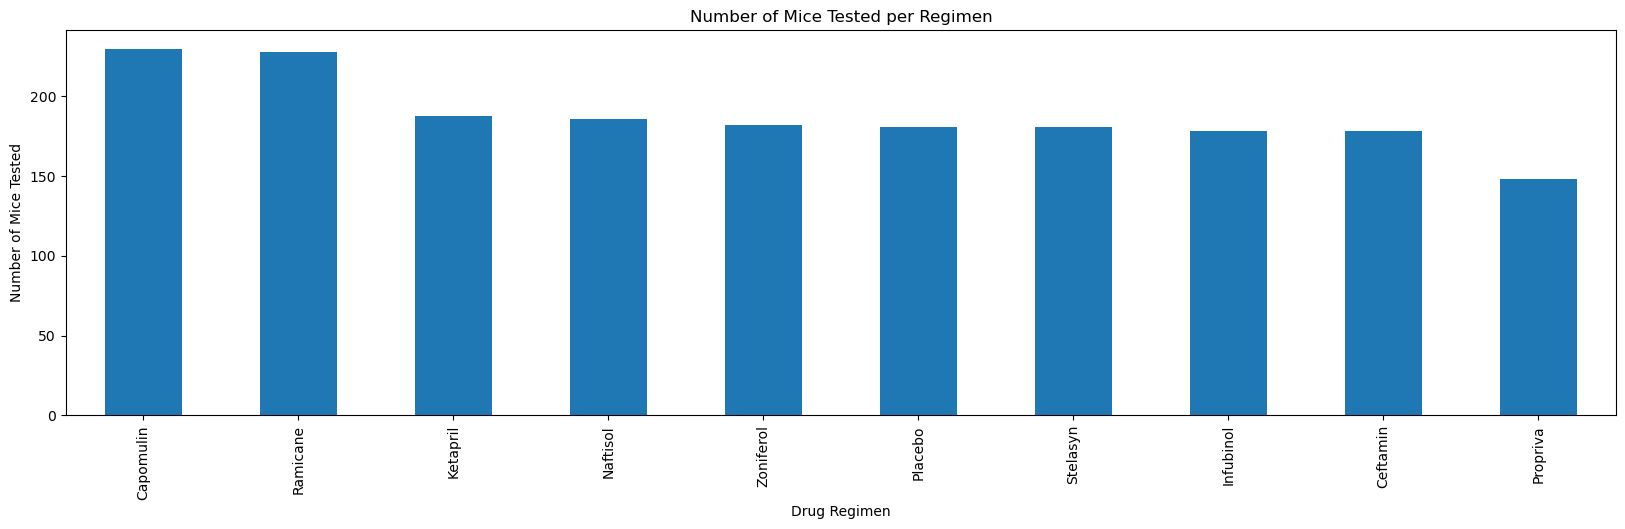

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
mouse_plot_count = clean_mouse_df['Drug Regimen'].value_counts()
mouse_plot_bar = mouse_plot_count.plot(kind='bar', figsize=(20, 5))
plt.title('Number of Mice Tested per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()
plt.tight_layout()

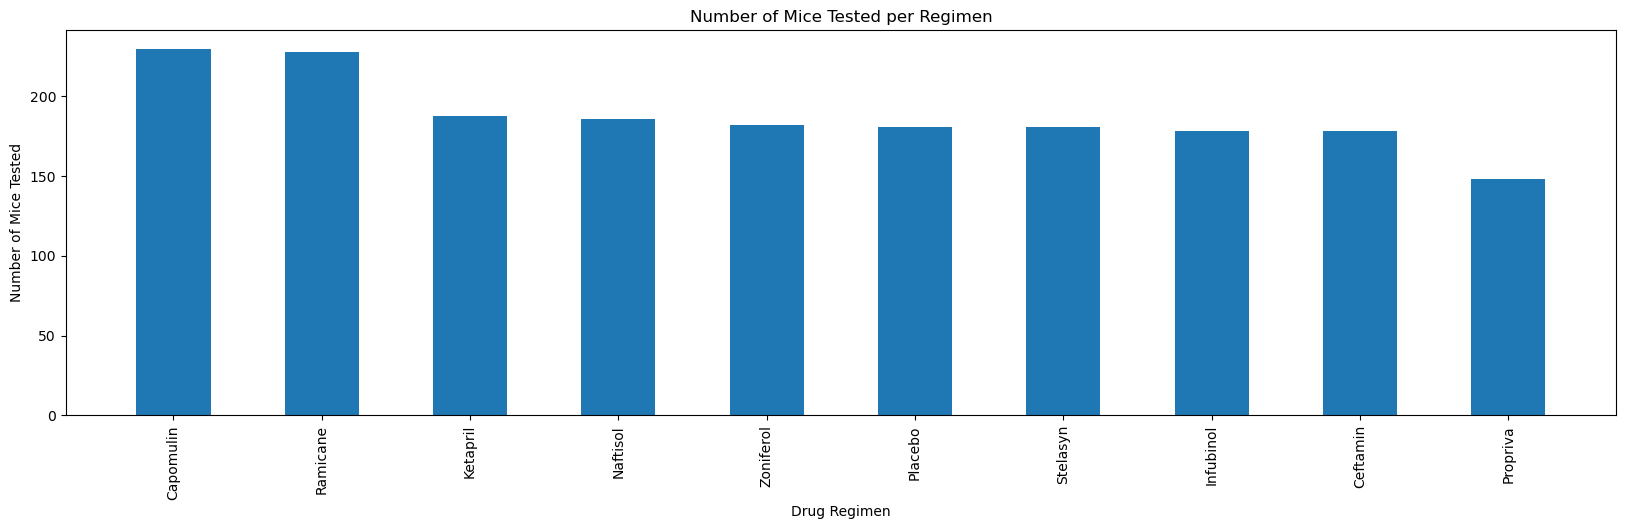

<Figure size 640x480 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
bar_x_axis = mouse_plot_count.index.values
bar_y_axis = mouse_plot_count.values
plt.figure(figsize=(20, 5))
plt.bar(bar_x_axis, bar_y_axis, width=.5, align='center')
plt.title('Number of Mice Tested per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation='vertical')
plt.show()
plt.tight_layout()

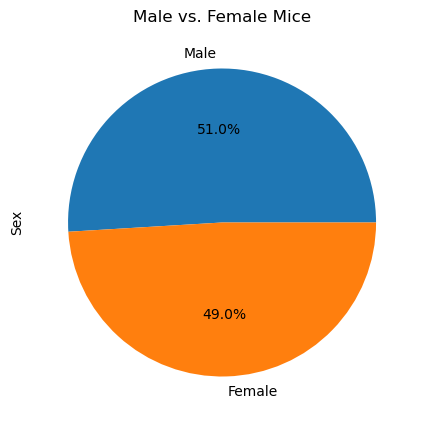

<Figure size 640x480 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gndr_plot_count = clean_mouse_df['Sex'].value_counts()
gndr_plot_pie = gndr_plot_count.plot(kind='pie', autopct='%1.1f%%', figsize=(20, 5))
plt.title('Male vs. Female Mice')
plt.ylabel('Sex')
plt.show()
plt.tight_layout()

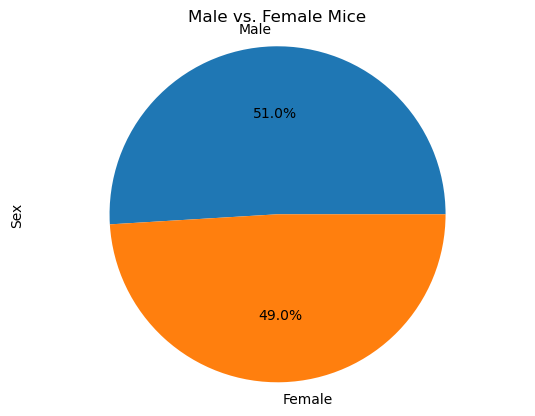

<Figure size 640x480 with 0 Axes>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
cir_labels = ['Male', 'Female']
plt.pie(gndr_plot_count, labels=cir_labels, autopct='%1.1f%%')
plt.title('Male vs. Female Mice')
plt.ylabel('Sex')
plt.axis('equal')
plt.show()
plt.tight_layout()

# Quartiles, Outliers, and Boxplots

In [15]:
# Create a DataFrame that has the last timepoint for each Mouse ID using groupby
# Reset the index of the DataFrame
# Retrieve the maximum timepoint for each mouse
max_time_df = clean_mouse_df.groupby(['Mouse ID'])['Timepoint'].max()
max_time_df = max_time_df.reset_index()
max_time_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [16]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df = pd.merge(max_time_df, clean_mouse_df, 
                           on=['Mouse ID', 'Timepoint'], how='left')
merged_mouse_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Create DataFrames for each regimen to refer back to later
capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin", :]
ramicane_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin", :]

In [18]:
# Put the four regimens into lists for loop and plot labels
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [19]:
# Create empty list to fill with tumor volume data
tumor_vol_list = []

In [20]:
# For Loop to display the IQR and the outliers for each drug regimen
for drug in drug_regimens:
    tumor_vol = merged_mouse_df.loc[merged_mouse_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    mean = tumor_vol.mean()
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"{drug}'s IQR: {round(iqr,3)}")
    print(f"{drug}'s potential outliers: below {round(lower_bound,3)} & above {round(upper_bound,3)}\n")

Capomulin's IQR: 7.782
Capomulin's potential outliers: below 20.705 & above 51.832

Ramicane's IQR: 9.099
Ramicane's potential outliers: below 17.913 & above 54.307

Infubinol's IQR: 11.477
Infubinol's potential outliers: below 36.833 & above 82.741

Ceftamin's IQR: 15.578
Ceftamin's potential outliers: below 25.355 & above 87.666



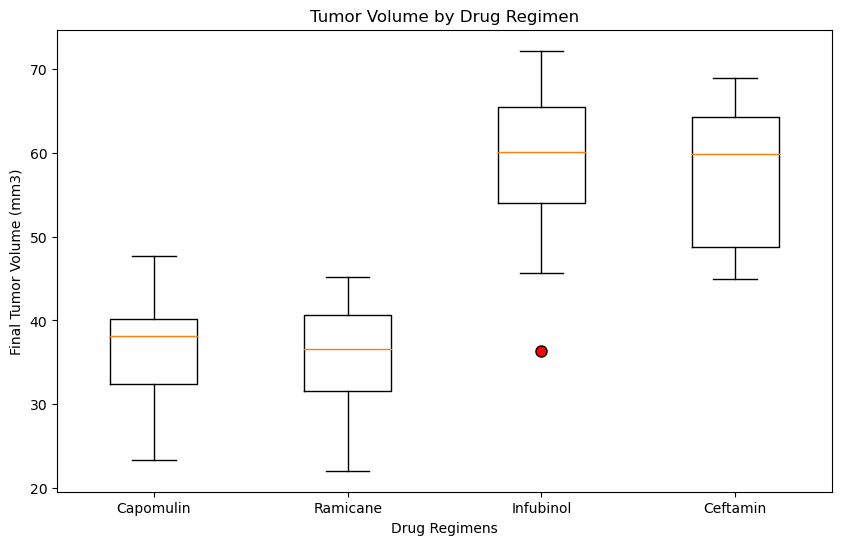

<Figure size 640x480 with 0 Axes>

In [21]:
# Generate a box plot to show the distribution of the final tumor volume for all mice in each drug regimen
flierprops = dict(markerfacecolor='red', marker='o', markersize=8)
fig1, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_xlabel('Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list, flierprops=flierprops)
ax1.set_xticklabels(drug_regimens)
plt.show()
plt.tight_layout()

# Line and Scatter Plots

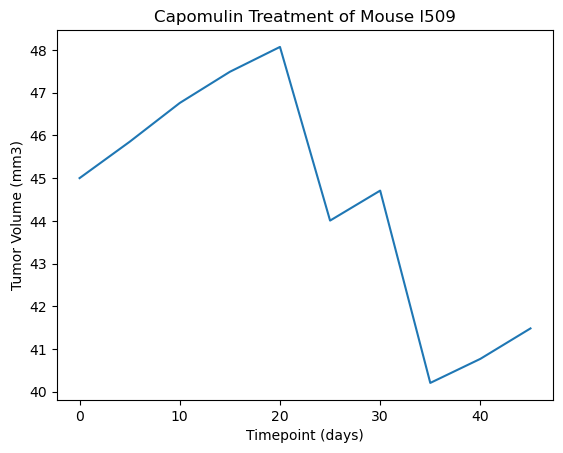

<Figure size 640x480 with 0 Axes>

In [22]:
# Generate a line plot to show tumor volume vs. timepoint for one mouse treated with Capomulin
chosen_mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509',:]
lin_x_axis = chosen_mouse_df['Timepoint']
lin_y_axis = chosen_mouse_df['Tumor Volume (mm3)']

plt.plot(lin_x_axis, lin_y_axis)
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
plt.tight_layout()

/var/folders/v3/6mht53l92kngrswbx20lzv440000gn/T/ipykernel_28088/57248566.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_cap_tum_vol = capomulin_df.groupby(['Mouse ID']).mean()


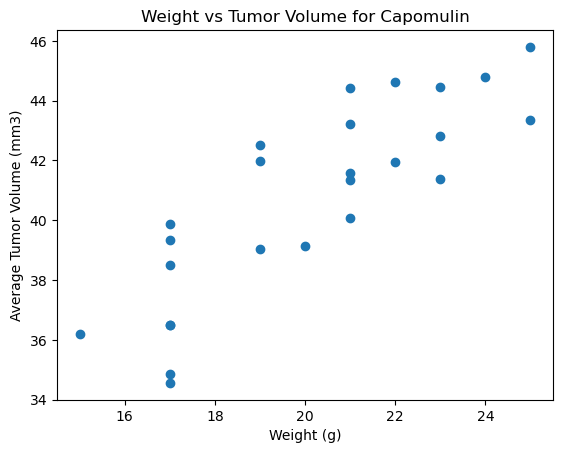

<Figure size 640x480 with 0 Axes>

In [23]:
# Generate a scatter plot that shows average tumor volume vs. mouse weight for Capomulin regimen
avg_cap_tum_vol = capomulin_df.groupby(['Mouse ID']).mean()
sct_x_axis = avg_cap_tum_vol['Weight (g)']
sct_y_axis = avg_cap_tum_vol['Tumor Volume (mm3)']

plt.scatter(sct_x_axis, sct_y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
plt.tight_layout()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


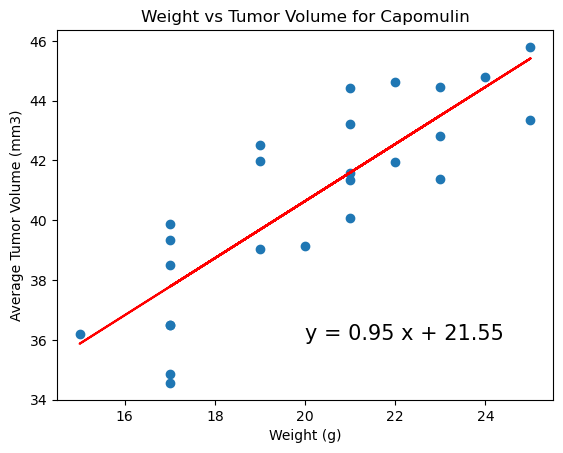

<Figure size 640x480 with 0 Axes>

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(sct_x_axis, sct_y_axis)
print(f'The correlation between mouse weight and the average tumor volume is {round(corr[0], 2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(sct_x_axis, sct_y_axis)
regress_values = sct_x_axis * slope + intercept
line_eq = f'y = {round(slope, 2)} x + {round(intercept, 2)}'

plt.scatter(sct_x_axis, sct_y_axis)
plt.plot(sct_x_axis, regress_values, color='red')
plt.title("Weight vs Tumor Volume for Capomulin")
plt.annotate(line_eq, (20,36), fontsize=15)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
plt.tight_layout()